In [1]:
%run "./Helmholtz.ipynb"

In [2]:
print("hello!")

hello!


Once the simulation is fully defined, the margin can be created.  The material properties on the edge of the simulation are propagated into the margin, but with increasing losses.  The losses are computed by $c\cdot(x/\text{margin})^a$, and are added to the existing imaginary component.

## Test 0 - Simple Dielectric Waveguide

The simulation is created with the line below.  The simulation will be comprised of a 100 wide by 75 tall domain.  The freespace wavelength is 20.  Note that Python is based on zero-indexing so valid values of $x$ are [0,99].

In [3]:
sim = EMSim(shape=(100,90), WL0=20)

The simulation is altered by changing the material refractive index point by point.  The index can be a complex number with negative imaginary parts indicating loss.

In [4]:
sim.setNIndexLineX(n=1.5, y0=45, xRange=(20,99), width=11)

In [8]:
sim.setPTypeRect(pType="zero", xyRange=((20,30),(55,70)))
sim.setPTypeRect(pType="zero", xyRange=((20,30),(20,35)))
sim.setPTypeRect(pType="derZero", xyRange=((10,15),(20,70)))

In [9]:
sim.setPTypeRect(pType="zero", xyRange=((90,95),(35,40)))

Additionally, sources can be created similarly.  Note that the source can be complex valued, indicating phase.

In [10]:
sim.setSource(val=1j, xy=(18,45))

The line below prepares the boundary of the simulation.  More on that later.

In [11]:
sim.BuildSimBounds()

We can visualize the simulation.  The 'zoom' level simply makes the image bigger.  The colors are intepreted as:
  * Red: Perfect Electric Conductor (PEC)
  * Blue: Perfect Magnetic Conductor (PMC)
  * Black: nIndex = 1
  * Cyan Intensity: (1 < nIndex < maxNRange)
  * Any Color: Source with phase

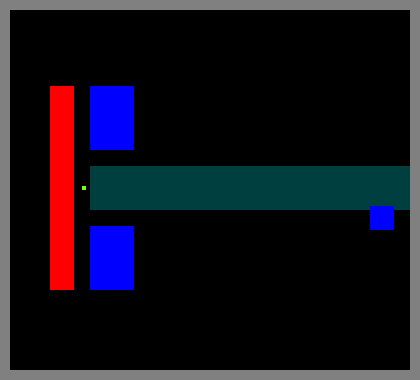

In [12]:
sim.visualizeSim(zoom=4, maxNRange=2, maxSourceRange=1.)

From here the equations of the system are built and solved.

In [13]:
sim.buildSparsePhysicsEqs();

In [14]:
sim.solve()

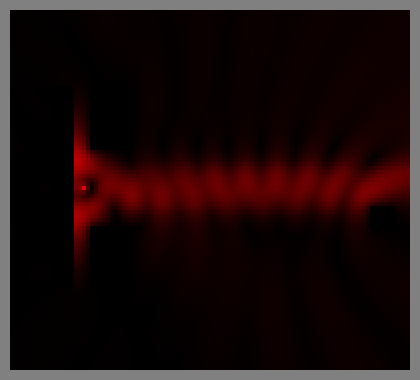

In [15]:
sim.visualizeField(zoom=4, func="abs", maxRange=1.0)

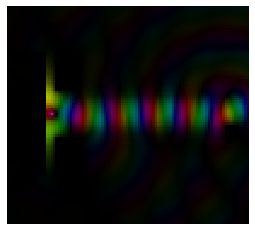

In [16]:
sim.animateFields(maxRange=0.5)

# Lens

In [721]:
WL0 = 20
xMax = round(10*WL0)
yMax = round(5*WL0)

xMid = round(xMax/2)
yMid = round(yMax/2)

R1 = 5*WL0
R2 = 5*WL0
nLens = 2
FL = round(((nLens - 1)*(1/R1 + 1/R2))**-1)
print("FL:", FL)

FL: 50


In [722]:
sim = EMSim(shape=(xMax, yMax), WL0=WL0)

In [723]:
def isLens(xy):
    (x,y) = xy
    x0 = xMid
    y0 = yMid
    r1 = R1
    r2 = R2
    
    x,y = xy
    inBall1 = (x - (x0 + 0.9*r1))**2 + (y - y0)**2 < r1**2
    inBall2 = (x - (x0 - 0.9*r2))**2 + (y - y0)**2 < r2**2
    inLens = inBall1 and inBall2
    return inLens

In [724]:
for x in range(xMax):
    for y in range(yMax):
        if isLens((x,y)):
            sim.nIndex[x,y] = 2

In [725]:
sim.sourceFull[10+sim.margin, :] = 1j

In [726]:
sim.BuildSimBounds()

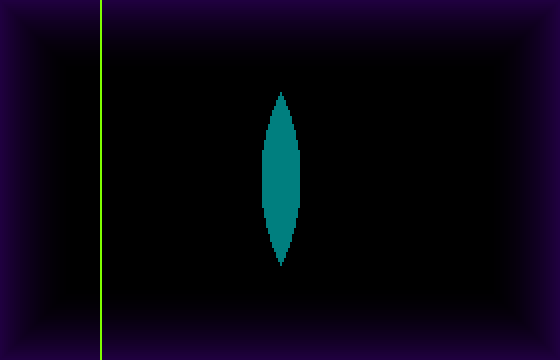

In [727]:
sim.visualizeSim(zoom=2, maxNRange=2, maxSourceRange=1., domain="full")

In [728]:
sim.buildSparsePhysicsEqs();

In [729]:
sim.solve()

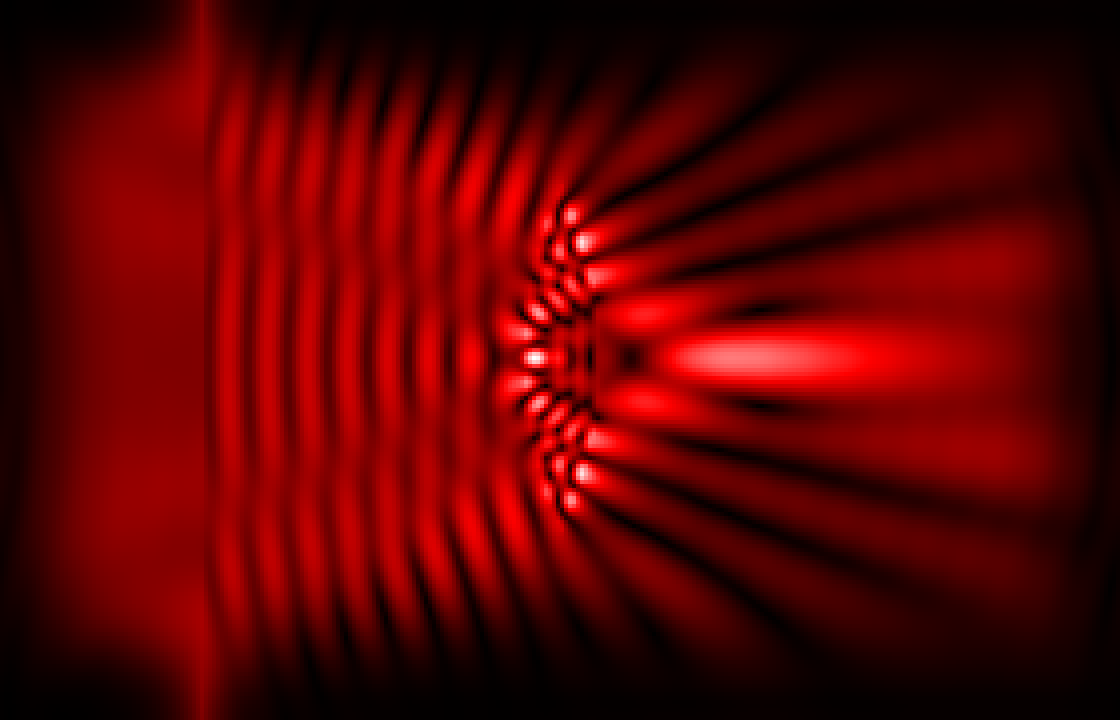

In [730]:
sim.visualizeField(zoom=4, func="abs", maxRange="auto",domain="full")

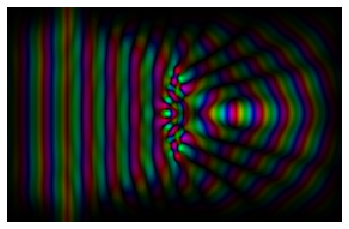

In [733]:
sim.animateFields(maxRange="auto", domain="full")

In [734]:
sim.sourceFull[:,:] = 0

In [735]:
sim.source[xMid-2*FL, yMid + round(2*WL0)] = 1j
sim.source[xMid-2*FL, yMid - round(2*WL0)] = -1j

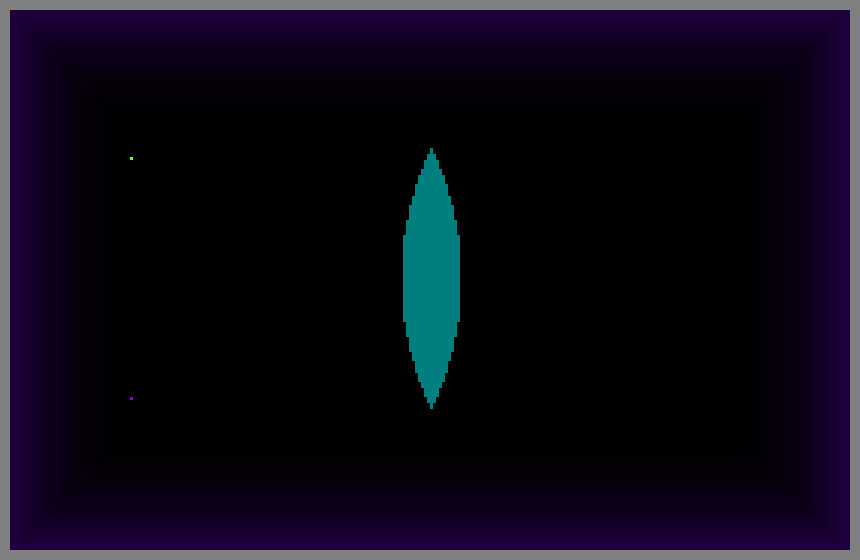

In [763]:
sim.visualizeSim(domain="full")

In [737]:
sim.buildSparsePhysicsEqs()
sim.solve()

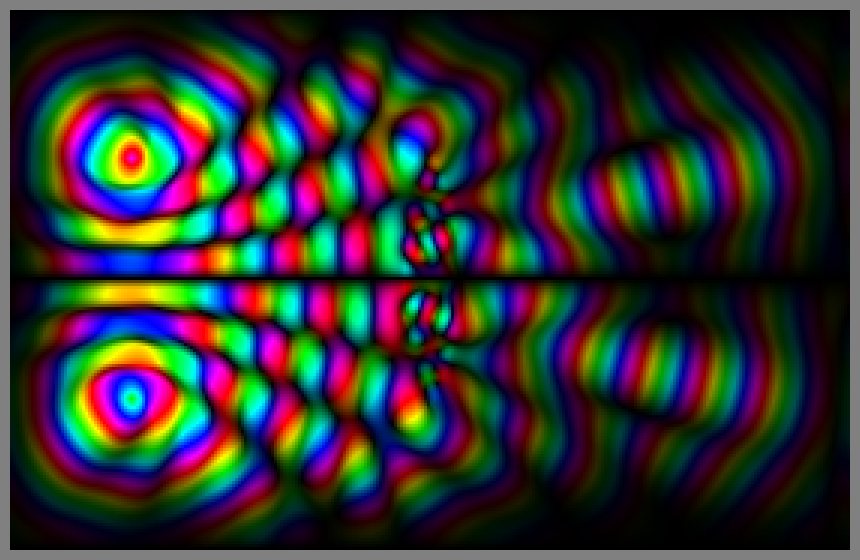

In [757]:
sim.visualizeField(maxRange=0.1, domain="full")

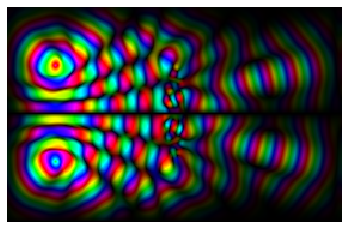

In [740]:
sim.animateFields(maxRange=0.1, domain="full")

# Waveguide Junction

In [850]:
WL0 = 20
xMax = round(10*WL0)
yMax = round(2*WL0)

xMid = round(xMax/2)
yMid = round(yMax/2)

In [851]:
sim = EMSim(shape=(xMax,yMax), WL0=WL0)

In [852]:
sim.pType[:,:] = sim.ZERO_CODE

In [853]:
def isWG(xy):  
    x,y = xy
    inWG1 = x<=xMid and -0.4*WL0 < y-yMid < 0.4*WL0
    inWG2 = x>=xMid and -0.4*WL0 < y-yMid < 0.8*WL0
    inWG = inWG1 or inWG2
    return inWG

In [854]:
for x in range(xMax):
    for y in range(yMax):
        if isWG((x,y)):
            sim.pType[x,y] = sim.NORMAL_CODE

In [855]:
sim.source[0, round(yMid-0.2*WL0)] = 1j

In [856]:
sim.BuildSimBounds()

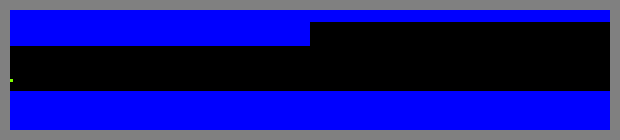

In [857]:
sim.visualizeSim()

In [858]:
sim.buildSparsePhysicsEqs()
sim.solve()

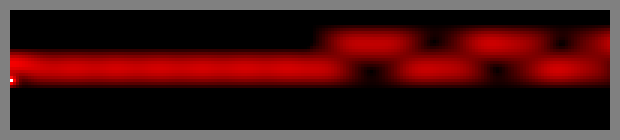

In [859]:
sim.visualizeField(func="abs")

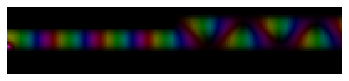

In [860]:
sim.animateFields()